In [25]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
#We do not want to see warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv("uber.csv")

In [28]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (200000, 9)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [29]:
#Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [31]:
#Number of missing values
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [32]:
# Drop duplicates and null values
df = df.drop_duplicates()
df = df.dropna()

In [33]:
# Check if there are categorical columns (like pickup/dropoff)
print("\nData Types:\n", df.dtypes)


Data Types:
 Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [34]:
# Convert datetime columns if present
for col in df.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [35]:
# Drop any columns not useful for price prediction (like IDs or timestamps)
drop_cols = ['id', 'key', 'pickup_datetime']  # adjust if not present
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

{'whiskers': [<matplotlib.lines.Line2D at 0x7879df9baf90>,
 'caps': [<matplotlib.lines.Line2D at 0x7879df9bb560>,
 'boxes': [<matplotlib.lines.Line2D at 0x7879dfda3500>],
 'medians': [<matplotlib.lines.Line2D at 0x7879df9bbc80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7879df9bbf80>],
 'means': []}

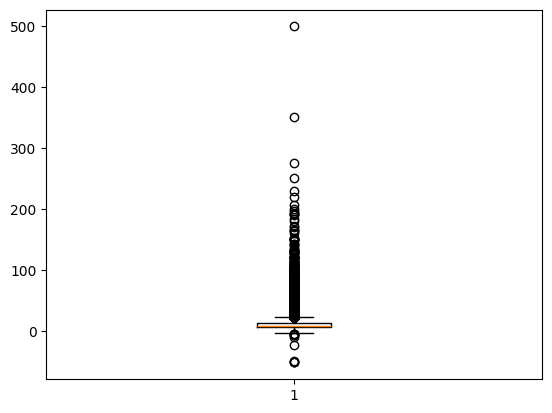

In [39]:
plt.boxplot(df['fare_amount'])

In [40]:
#Remove Outliers
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

In [42]:
# Target variable
y = df['fare_amount']  # adjust if your column name is different (e.g., 'fare_amount')

# Features
X = df.drop(columns=['fare_amount'])  # exclude target

In [43]:
# Convert categorical to numeric (if any)
X = pd.get_dummies(X, drop_first=True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [48]:
# Evaluate
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("\nLinear Regression Results:")
print("RMSE:", lr_rmse)
print("R²:", lr_r2)


Linear Regression Results:
RMSE: 8.11069071043841
R²: 0.00013541786208959294


In [49]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [50]:
# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("\nRandom Forest Results:")
print("RMSE:", rf_rmse)
print("R²:", rf_r2)


Random Forest Results:
RMSE: 3.7097998214462358
R²: 0.7908169669754554


In [51]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [lr_rmse, rf_rmse],
    'R² Score': [lr_r2, rf_r2]
})
print("\nModel Comparison:\n", results)


Model Comparison:
                Model      RMSE  R² Score
0  Linear Regression  8.110691  0.000135
1      Random Forest  3.709800  0.790817
